# Contexto

Prepare um dataset que será utilizado para classificação de Churn.

O dataset utilizado é proveniente de uma empresa fictícia de telefonia, criado e disponibilizado pela IBM para fins didáticos.

O dicionário com as descrições das features pode ser encontrado [neste link no Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).

# Settings

## Libraries

In [ ]:
!pip install pandas-profiling==3.6.6

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
df = pd.read_excel('https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx', index_col=0)
display(df)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN


# EDA

In [ ]:
ProfileReport(df, title="Profiling Report")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Verificando suplicados
df.duplicated().sum().any()

False

In [ ]:
# Valores faltantes
df.isna().sum()

Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
# Verificando o motivo de tantos valores de churn vazios
# Encontrado que todos os valores de churn estarem vazios é por conta do valore de Churn label
# df[df['Churn Reason'].isna()]
df[df['Churn Reason'].isna()]['Churn Label'].value_counts()

No    5174
Name: Churn Label, dtype: int64

In [ ]:
df.filter(like='Churn')

,Churn Label,Churn Value,Churn Score,Churn Reason
CustomerID,,,,
3668-QPYBK,Yes,1,86,Competitor made better offer
9237-HQITU,Yes,1,67,Moved
9305-CDSKC,Yes,1,86,Moved
7892-POOKP,Yes,1,84,Moved
0280-XJGEX,Yes,1,89,Competitor had better devices
...,...,...,...,...
2569-WGERO,No,0,45,NaN
6840-RESVB,No,0,59,NaN
2234-XADUH,No,0,71,NaN


In [ ]:
# vamos ignorar essas colunas
df.drop(columns=['Churn Label', 'Churn Score', 'Churn Reason'], inplace=True)

In [ ]:
# verificando as colunas e quantos valores unicos elas tem
# as colunas que tem apenas um valor serão descartasdas por não oferecerem valor na analise
df.nunique()

Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
CLTV                 3438
dtype: int64

In [ ]:
constant_cols  = df.columns[df.nunique()==1]
df.drop(columns= constant_cols, inplace=True)

In [ ]:
df.head()

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,5372
7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,5340


In [ ]:
# Exluindo mais colunas que não fazem sentido para essa analise
# City apenas será excluida por conta da alta granularidade
geographic_cols2drop = ['Zip Code', 'Lat Long','City']
df.drop(columns=geographic_cols2drop, inplace=True)

In [ ]:
df.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,5372
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,5340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7043 non-null   float64
 1   Longitude          7043 non-null   float64
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract      

In [ ]:
# Converter Total charges para float
# Como deu errado com o código -
# df['Total Charges'].astype(float)

for idx, value in enumerate(df['Total Charges']):
  float(value)

In [ ]:
# Verificando que existe um espaço e por isso que não da para passar para float
df.iloc[idx]['Total Charges']

''

In [ ]:
df['Total Charges'].replace(' ', '')

In [ ]:
# Podemos ver que em uma mesma coluna temos 3 tipo de dados
# Por isso que veio objeto, podemos ter valores que estão mesclados
df['Total Charges'].map(lambda x : type(x)).unique()

array([<class 'float'>, <class 'int'>, <class 'str'>], dtype=object)

In [ ]:
df[df['Total Charges'].map(lambda x : isinstance(x, int))][['Total Charges']].astype(float)

,Total Charges
CustomerID,
3376-BMGFE,273.0
2472-OVKUP,531.0
5583-SXDAG,70.0
1343-EHPYB,6603.0
4572-DVCGN,846.0
...,...
6211-WHMYA,2751.0
3454-JFUBC,1396.0
1024-KPRBB,3342.0


In [ ]:
str_idx = df['Total Charges'].map(lambda x: isinstance(x, str))
int_idx = df['Total Charges'].map(lambda x: isinstance(x, int))

df.loc[int_idx, 'Total Charges'] = df.loc[int_idx, 'Total Charges'].astype(float)
df.loc[str_idx, 'Total Charges'] = 0

In [ ]:
df['Total Charges'] = df['Total Charges'].astype(float)
df['Total Charges']

CustomerID
3668-QPYBK     108.15
9237-HQITU     151.65
9305-CDSKC     820.50
7892-POOKP    3046.05
0280-XJGEX    5036.30
               ...   
2569-WGERO    1419.40
6840-RESVB    1990.50
2234-XADUH    7362.90
4801-JZAZL     346.45
3186-AJIEK    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [ ]:
# Observando os itens que o Total Charges está como zero
df[df['Total Charges']==0]

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,2578
3115-CZMZD,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,0,5504
5709-LVOEQ,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0,2048
4367-NUYAO,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0,4950
1371-DWPAZ,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0,4740
7644-OMVMY,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0,2019
3213-VVOLG,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0,2299
2520-SGTTA,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,0,3763
2923-ARZLG,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0,4890


In [ ]:
# Retirando esses valores que estão como zero

df = df[df['Total Charges']!=0]

In [ ]:
df.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [ ]:
# Verificando as variáveis numericas
df.select_dtypes('number')

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,
3668-QPYBK,33.964131,-118.272783,2,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,2,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,8,99.65,820.50,1,5372
7892-POOKP,34.062125,-118.315709,28,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,49,103.70,5036.30,1,5340
...,...,...,...,...,...,...,...
2569-WGERO,34.341737,-116.539416,72,21.15,1419.40,0,5306
6840-RESVB,34.667815,-117.536183,24,84.80,1990.50,0,2140
2234-XADUH,34.559882,-115.637164,72,103.20,7362.90,0,5560


<AxesSubplot:>

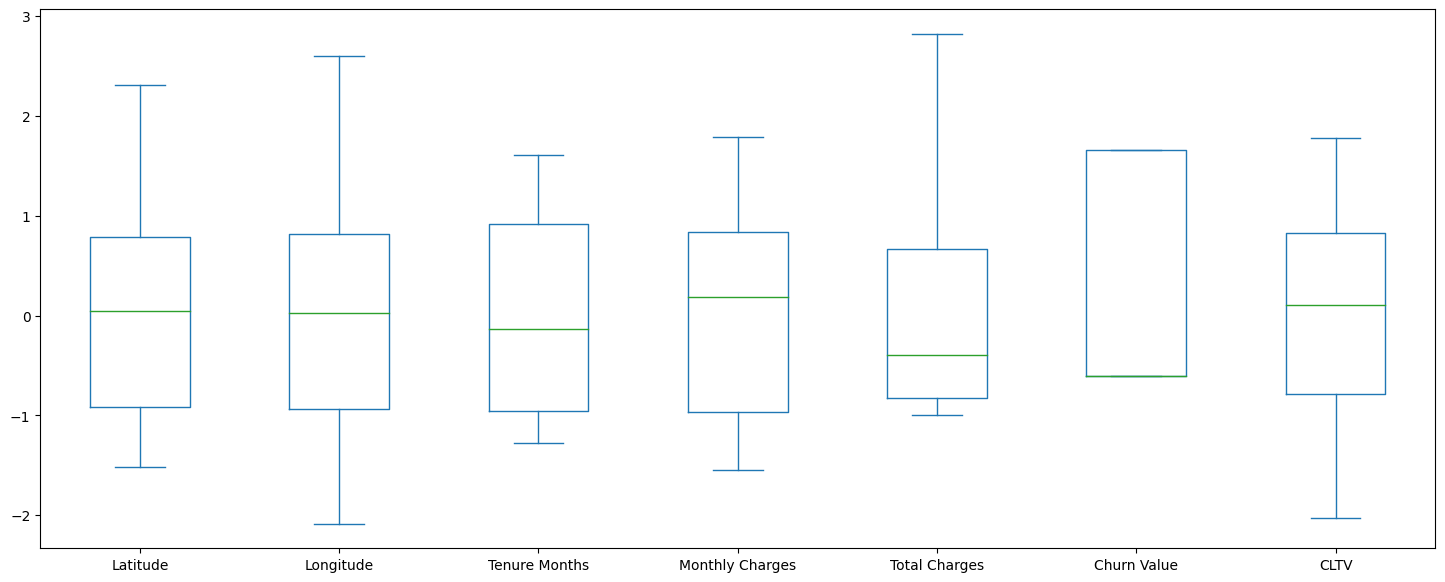

In [ ]:
# Verificando como que está a distribuição de cada uma delas

numeric_cols =  df.select_dtypes('number').columns

df[numeric_cols].apply(scale).plot.box(figsize=(18,7))

Caso houvesse outliers seria necessario ver se fossem muito extremos e talvez excluir ou em casos de não tão extremos apenas substituir o valor com uma media por exemplo

In [ ]:
df_features = df.drop(columns='Churn Value')

target =df['Churn Value']

In [ ]:
# Criando o Onehot coding
numeric_cols = df_features.select_dtypes('number').columns
categorical_cols = df_features.select_dtypes(exclude='number').columns

In [ ]:
# Pipeline

preprocessing = ColumnTransformer([
    ('numerical_preprocessing', StandardScaler(), numeric_cols),
    ('categorical_preprocessing', OneHotEncoder(), categorical_cols)
])

preprocessing

ColumnTransformer(transformers=[('numerical_preprocessing', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')),
                                ('categorical_preprocessing', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

In [ ]:
preprocessing.fit(df_features)

ColumnTransformer(transformers=[('numerical_preprocessing', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')),
                                ('categorical_preprocessing', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

In [ ]:
pd.DataFrame(
    data= preprocessing.transform(df_features),
    columns= preprocessing.get_feature_names_out()
)



,numerical_preprocessing__Latitude,numerical_preprocessing__Longitude,numerical_preprocessing__Tenure Months,numerical_preprocessing__Monthly Charges,numerical_preprocessing__Total Charges,numerical_preprocessing__CLTV,categorical_preprocessing__Gender_Female,categorical_preprocessing__Gender_Male,categorical_preprocessing__Senior Citizen_No,categorical_preprocessing__Senior Citizen_Yes,...,categorical_preprocessing__Streaming Movies_Yes,categorical_preprocessing__Contract_Month-to-month,categorical_preprocessing__Contract_One year,categorical_preprocessing__Contract_Two year,categorical_preprocessing__Paperless Billing_No,categorical_preprocessing__Paperless Billing_Yes,categorical_preprocessing__Payment Method_Bank transfer (automatic),categorical_preprocessing__Payment Method_Credit card (automatic),categorical_preprocessing__Payment Method_Electronic check,categorical_preprocessing__Payment Method_Mailed check
0,-0.944312,0.707522,-1.239504,-0.363923,-0.959649,-0.983181,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.905569,0.691467,-1.239504,0.196178,-0.940457,-1.438215,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.910157,0.697709,-0.995040,1.158489,-0.645369,0.820883,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.904411,0.687625,-0.180161,1.329677,0.336516,0.508788,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.913735,0.710530,0.675462,1.293113,1.214589,0.793818,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.790560,1.510961,1.612573,-1.450886,-0.381142,0.765061,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7028,-0.657789,1.048946,-0.343137,0.664868,-0.129180,-1.912702,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7029,-0.701736,1.929167,1.612573,1.276493,2.241056,0.979891,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7030,-0.861383,1.360359,-0.872808,-1.170004,-0.854514,-1.360403,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_mi =df.copy()

encoder  = OrdinalEncoder()
df_mi[categorical_cols] = encoder.fit_transform(df[categorical_cols]).astype(int)
df_mi.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,1,0,0,0,2,1,0,0,...,0,0,0,0,1,3,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,0,0,0,1,2,1,0,1,...,0,0,0,0,1,2,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,0,0,0,1,8,1,2,1,...,0,2,2,0,1,2,99.65,820.50,1,5372
7892-POOKP,34.062125,-118.315709,0,0,1,1,28,1,2,1,...,2,2,2,0,1,2,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,1,0,0,1,49,1,2,1,...,0,2,2,0,1,0,103.70,5036.30,1,5340


In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# criando o features desse dataframe
df_features = df_mi.drop(columns='Churn Value')
target = df_mi['Churn Value']

In [ ]:
discrete_cols = df_features.dtypes==int

mi_scores = mutual_info_classif(X=df_features, y=target, discrete_features=discrete_cols)
mi_scores

array([4.34855196e-03, 1.38867477e-02, 3.65043380e-05, 1.05326247e-02,
       1.13831478e-02, 3.76130422e-02, 7.89502804e-02, 6.91441222e-05,
       7.98356597e-04, 5.53936936e-02, 6.45282415e-02, 4.66589945e-02,
       4.37842863e-02, 6.28727975e-02, 3.18025368e-02, 3.19183710e-02,
       9.81821992e-02, 1.91192652e-02, 4.44229250e-02, 4.57190791e-02,
       4.28675007e-02, 2.97138620e-01])

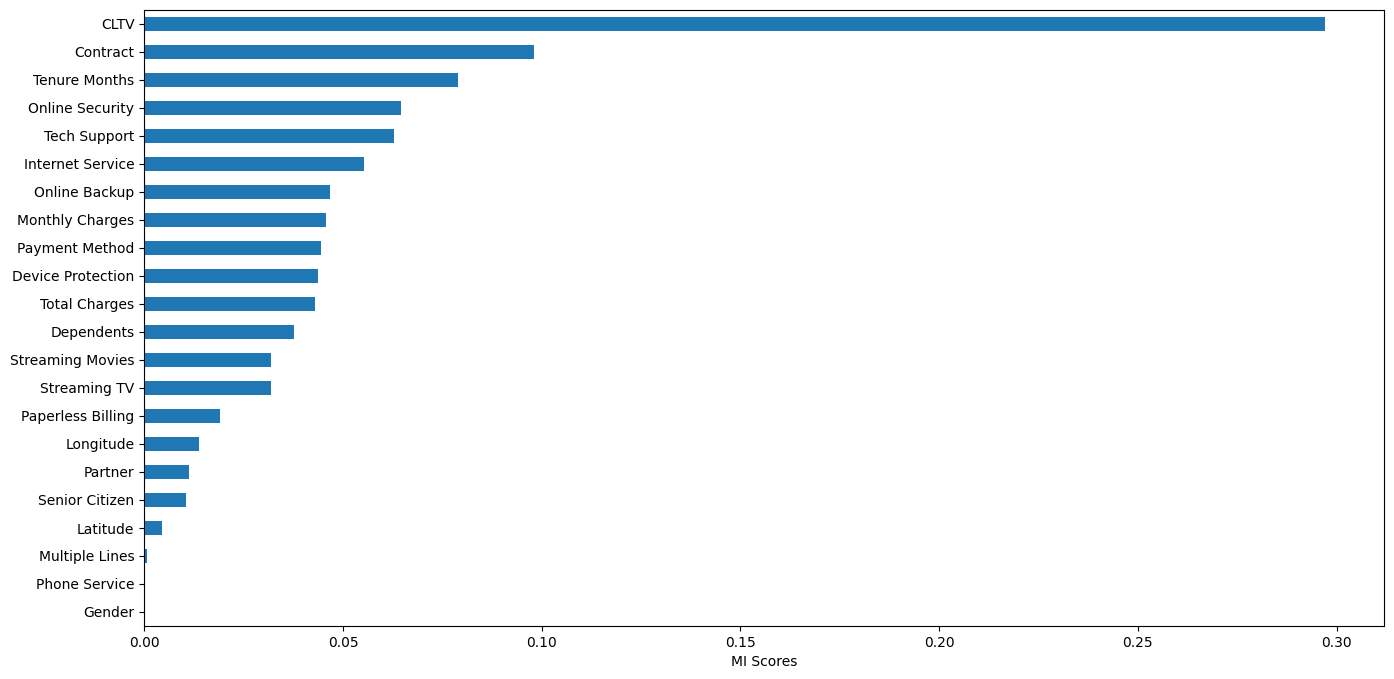

In [ ]:
pd.Series(mi_scores, index=df_features.columns).sort_values().plot.barh(figsize=(16,8))
plt.xlabel('MI Scores')
plt.show()

In [ ]:
df_features

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,1,0,0,0,2,1,0,0,...,0,0,0,0,0,1,3,53.85,108.15,3239
9237-HQITU,34.059281,-118.307420,0,0,0,1,2,1,0,1,...,0,0,0,0,0,1,2,70.70,151.65,2701
9305-CDSKC,34.048013,-118.293953,0,0,0,1,8,1,2,1,...,2,0,2,2,0,1,2,99.65,820.50,5372
7892-POOKP,34.062125,-118.315709,0,0,1,1,28,1,2,1,...,2,2,2,2,0,1,2,104.80,3046.05,5003
0280-XJGEX,34.039224,-118.266293,1,0,0,1,49,1,2,1,...,2,0,2,2,0,1,0,103.70,5036.30,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,34.341737,-116.539416,0,0,0,0,72,1,0,2,...,1,1,1,1,2,1,0,21.15,1419.40,5306
6840-RESVB,34.667815,-117.536183,1,0,1,1,24,1,2,0,...,2,2,2,2,1,1,3,84.80,1990.50,2140
2234-XADUH,34.559882,-115.637164,0,0,1,1,72,1,2,1,...,2,0,2,2,1,1,1,103.20,7362.90,5560
